<font style="font-size:28px;" align="left"><b> 1D discrete quantum walk </b></font>
<br>

In [29]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import matplotlib.pyplot as plt
import numpy as np

# Define the number of position qubits (3 qubits for 8 nodes)
n_qubits_per_dim = 3

N_per_dim = 2**n_qubits_per_dim

matrix_minus = np.zeros(N_per_dim**2).reshape(N_per_dim, N_per_dim)
matrix_minus[np.eye(len(matrix_minus), k=1, dtype='bool')] = 1
matrix_minus[N_per_dim-1, 0] = 1

matrix_plus = np.zeros(N_per_dim**2).reshape(N_per_dim, N_per_dim)
matrix_plus[np.eye(len(matrix_plus), k=-1, dtype='bool')] = 1
matrix_plus[0, N_per_dim-1] = 1

gate_plus = UnitaryGate(matrix_plus, label="step plus")
gate_minus = UnitaryGate(matrix_minus, label="step minus")

# Define a single step of the quantum walk
def quantum_walk_step(qc, n_qubits_per_dim):    
    # Hadamard gate on the walker qubit
    qc.h(2*n_qubits_per_dim)
    
    qc.append(gate_plus.control(1), list(np.append([2*n_qubits_per_dim], range(0, n_qubits_per_dim))))
    qc.append(gate_minus.control(1, ctrl_state=0), list(np.append([2*n_qubits_per_dim], range(n_qubits_per_dim, 2*n_qubits_per_dim))))

In [30]:
# Create the quantum circuit
qc = QuantumCircuit(2*n_qubits_per_dim + 1, 2*n_qubits_per_dim)

display(qc.draw(reverse_bits=True))

q_6: 
     
q_5: 
     
q_4: 
     
q_3: 
     
q_2: 
     
q_1: 
     
q_0: 
     
c: 6/

In [31]:
# Apply multiple steps of the quantum walk
num_steps = 3
for _ in range(num_steps):
    quantum_walk_step(qc, n_qubits_per_dim)

display(qc.draw(reverse_bits=True))

┌───┐                             ┌───┐                             ┌───┐»
q_6: ┤ H ├──────■──────────────o───────┤ H ├──────■──────────────o───────┤ H ├»
     └───┘      │       ┌──────┴──────┐└───┘      │       ┌──────┴──────┐└───┘»
q_5: ───────────┼───────┤2            ├───────────┼───────┤2            ├─────»
                │       │             │           │       │             │     »
q_4: ───────────┼───────┤1 step minus ├───────────┼───────┤1 step minus ├─────»
                │       │             │           │       │             │     »
q_3: ───────────┼───────┤0            ├───────────┼───────┤0            ├─────»
          ┌─────┴──────┐└─────────────┘     ┌─────┴──────┐└─────────────┘     »
q_2: ─────┤2           ├────────────────────┤2           ├────────────────────»
          │            │                    │            │                    »
q_1: ─────┤1 step plus ├────────────────────┤1 step plus ├────────────────────»
          │            │                    │            │                    »
q_0: ─────┤0           ├────────────────────┤0           ├────────────────────»
          └────────────┘                    └────────────┘                    »
c: 6/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                  
«q_6: ──────■──────────────o───────
«           │       ┌──────┴──────┐
«q_5: ──────┼───────┤2            ├
«           │       │             │
«q_4: ──────┼───────┤1 step minus ├
«           │       │             │
«q_3: ──────┼───────┤0            ├
«     ┌─────┴──────┐└─────────────┘
«q_2: ┤2           ├───────────────
«     │            │               
«q_1: ┤1 step plus ├───────────────
«     │            │               
«q_0: ┤0           ├───────────────
«     └────────────┘               
«c: 6/═════════════════════════════
«

{'000010': 12631, '000011': 12404, '000000': 12638, '000001': 62327}


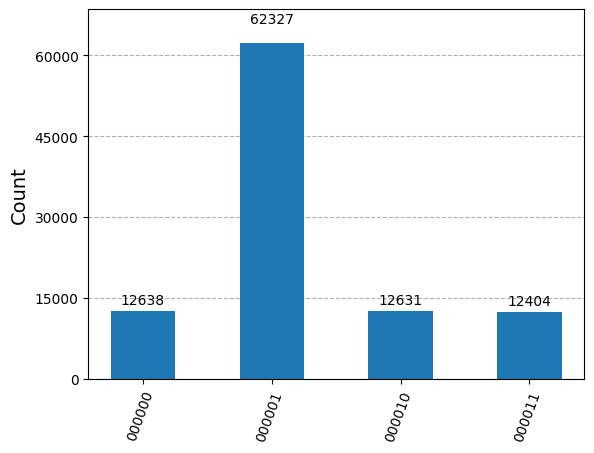

In [34]:
# Measure the position qubits
qc.measure(range(n_position_qubits), range(n_position_qubits))

num_shots = 100000
backend = AerSimulator()
comp = transpile(qc, backend) # transpile means transform a quantum circuit into a form that is optimized for execution on a specific quantum backend
job_sim = backend.run(comp, shots=num_shots) # run the circuit
counts = job_sim.result().get_counts(comp) # extract the results of the code execution (how many counts of which measurement I got)
print(counts)

# Get the counts and plot the histogram

plot_histogram(counts)